## Distribuição de Poisson

Para gerarmos dados com uma distribuição de Poisson, podemos usar a biblioteca Numpy

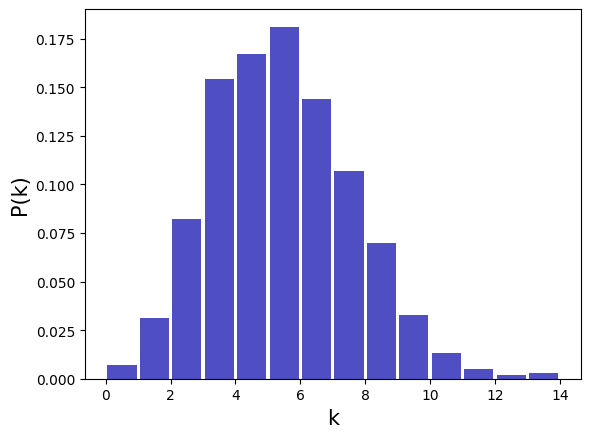

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lbd = 5 # taxa
n = 1000 # numero de pontos extraidos de uma distribuicao de Poisson
P = np.random.poisson(lbd, n)
k = np.arange(0, np.max(P))
count, bins, ignored = plt.hist(P, bins = k, density=True, color='#0504aa', alpha = 0.7, rwidth=0.9)

plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)', fontsize = 15)
plt.show(True)

### Lei dos Eventos raros

A distribuição de Poisson é obtida quando aumentamos o número de experimentos e a probabilidade e sucesso é próxima de zero.
$$ \lim_{x \to \infty,\;  p \to 0} \dfrac{n!}{(n-k)! k!}p^{k}(1-p)^{n-k} = \dfrac{e^{-\lambda} \lambda^{k}}{k!}$$

Na simulação abaixo, vemos que se diminuitmos a probabilidade de sucessao, a distribuição binomial se aproxima da Poisson.

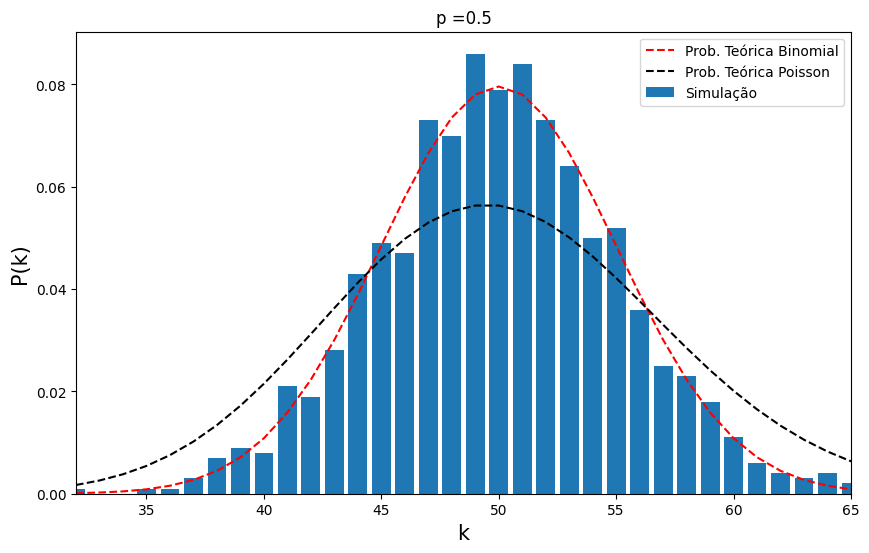

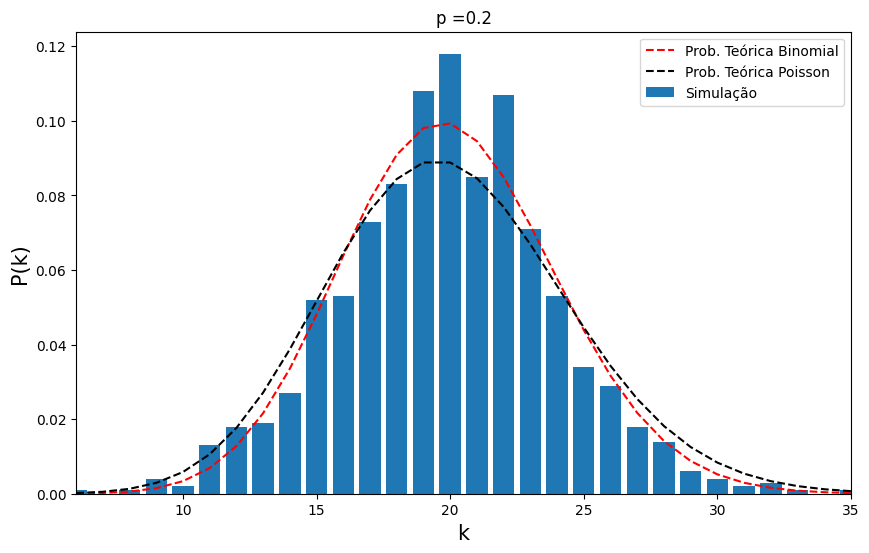

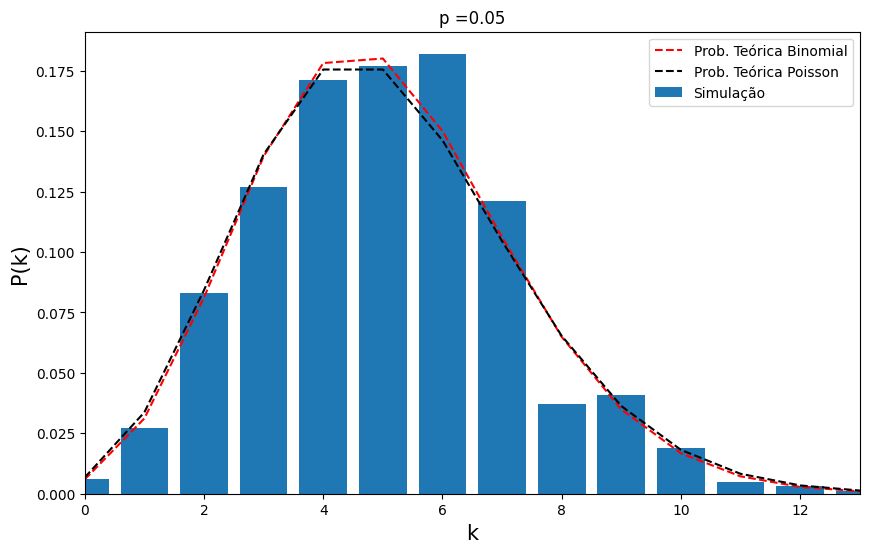

In [8]:
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.special import factorial

seed(100) # semente do gerador de números aleatórios

vp = [0.5, 0.2, 0.05] # probabilidade de sucesso
for p in vp:
    n = 100 # número de experimentos
    pk = np.zeros(n)
    vk = np.arange(0,n)
    ns = 1000 # número de simulações

    for j in range(0, ns): # faça para ns simulações
        s = 0 # número de sucessos
        for i in range(0,n): # faça para n experimentos
            r = np.random.uniform() #
            if(r <=p): # se sucesso
                s = s + 1
        pk[s] = pk[s] + 1
    pk = pk/sum(pk) # normaliza a distribuição de probabilidade
    plt.figure(figsize=(10,6))
    plt.xlim(np.min(vk[pk>0]), np.max(vk[pk>0]))
    plt.bar(vk, pk, label='Simulação')

    # curva teórica
    pkt = np.zeros(n+1) # valores teóricos da probabilidade
    vkt = np.arange(0,n+1) # variação em k
    for k in range(0, n+1):
        pkt[k] = (factorial(n)/(factorial(n-k)*factorial(k)))*(p**k)*(1-p)**(n-k)
    plt.plot(vkt, pkt, 'r--', label='Prob. Teórica Binomial')

    # Curva teórica
    Po = np.zeros(n+1) # valores teóricos da probalidade
    vo = np.arange(0,n+1) # variação em k
    lbd = n*p
    for k in range(0,n+1): # varia de 0 até n
        Po[k] = (np.exp(-lbd)*lbd**k)/factorial(k)
    plt.plot(vo, Po, 'k--', label = 'Prob. Teórica Poisson')
    plt.title('p ='+ str(p))
    plt.xlabel('k', fontsize = 15)
    plt.ylabel('P(k)', fontsize = 15)
    plt.legend()
    plt.show(True)

## Distribuição Geométrica

Uma variável aleatória X segue uma distribuição geométrica se:

$$P(X = k) = p(1-p)^{k-1}, \qquad k \; = \; 0,1,...$$

Para gerarmos dados com uma distribuição geométrica, podemos usar a biblioteca Numpy

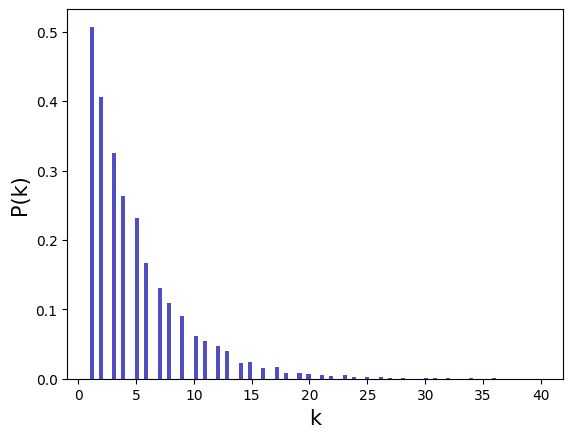

Valor esperado Teórico: 5.0
Valor esperado pela simulação: 4.9782


In [9]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.2
n = 10000 # 
x = np.random.geometric(p, size=n)
count, bins, ignored = plt.hist(x, bins=k, density=True, color='#0504aa', alpha=0.7, rwidth=0.9)

plt.xlabel('k', fontsize= 15)
plt.ylabel('P(k)', fontsize= 15)
plt.show(True)
print('Valor esperado Teórico:', 1/p)
print('Valor esperado pela simulação:', np.sum(x)/len(x))